In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # type: ignore
from sklearn.cluster import KMeans # type: ignore

In [2]:
df = pd.read_csv('customer_data_records.csv')
print(df)

     CustomerID  Annual Income (k$)  Spending Score (1-100)
0             1                 117                      20
1             2                 107                      59
2             3                  29                      36
3             4                 121                      19
4             5                  86                      90
..          ...                 ...                     ...
169         170                 111                      76
170         171                 138                      87
171         172                  84                      15
172         173                 107                      92
173         174                  17                      98

[174 rows x 3 columns]


In [6]:
#select features for clustering
x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
#Apply k-means clustering
#I use only 2 clusters
kmeans = KMeans(n_clusters=2 , random_state=0)
kmeans.fit(x)

e:\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [8]:
#Add Cluster labels to dataset
df['Cluster'] = kmeans.labels_
print(df)

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                 117                      20        1
1             2                 107                      59        1
2             3                  29                      36        0
3             4                 121                      19        1
4             5                  86                      90        0
..          ...                 ...                     ...      ...
169         170                 111                      76        1
170         171                 138                      87        1
171         172                  84                      15        0
172         173                 107                      92        1
173         174                  17                      98        0

[174 rows x 4 columns]


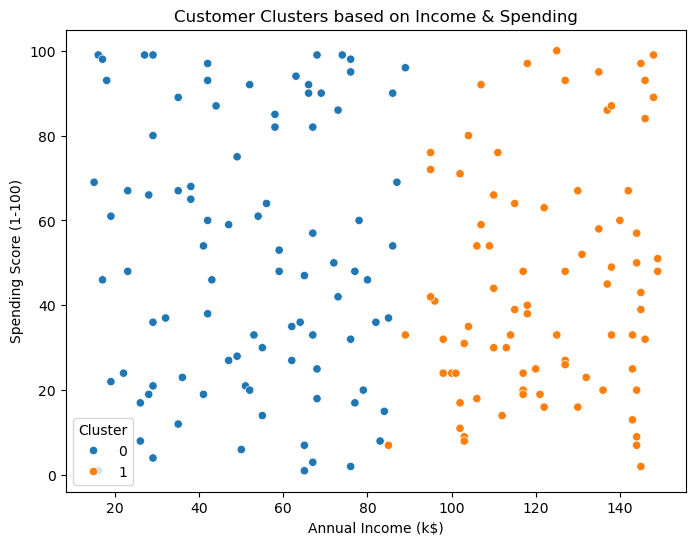

In [9]:
#Visualize the cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)' , y= 'Spending Score (1-100)' , hue='Cluster')
plt.title('Customer Clusters based on Income & Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()